# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

[Fornecemos alguns comentários para guiar sua linha de raciocínio enquanto você trabalha neste projeto. Entretanto, certifique-se de remover todos os comentários entre colchetes antes de enviar o projeto.]

[Antes de começar a análise dos dados, explique com suas próprias palavras o propósito do projeto e as ações que planeja realizar.]

[Tenha em mente que estudar, modificar e analisar dados é um processo iterativo. É normal retornar a etapas anteriores e corrigir/expandir algo para permitir as próximas etapas.]

***Objetivo do projeto: Determinar qual plano pré-pago gera mais receita.***

Ações que planejo realizar.

1. Pré-processamento e Exploração Inicial
2. Análise Exploratória de Dados
3. Cálculo da Receita
4. Comparação dos Planos
5. Testes Estatísticos

## Inicialização

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st


## Carregue os dados

In [2]:
# Carregue os arquivos de dados em diferentes DataFrames

calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')


## Prepare os dados

[Os dados deste projeto estão divididos em várias tabelas. Explore cada uma para obter uma compreensão inicial dos dados. Faça correções em cada tabela, se necessário.]

## Planos

In [3]:
# Imprima informações gerais/resumo sobre o DataFrame dos planos

print("Chamadas")
display(calls.describe())
display(calls.info())

print("Internet")
display(internet.describe())
display(internet.info())

print("Mensagens")
display(messages.describe())
display(messages.info())

print("Planos")
display(plans.describe())
display(plans.info())

print("Usuários")
display(users.describe())
display(users.info())

Chamadas


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

Internet


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

Mensagens


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

Planos


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

Usuários


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

In [4]:
# Imprima uma amostra de dados dos planos

display(calls.head())
display(internet.head())
display(messages.head())
display(plans.head())
display(users.head())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

***Problemas notados:***

    
* A duração das chamadas está em formato decimal, mas, segundo a descrição, deveria ser arredondada para o minuto mais próximo.

Sessões de Internet (internet)

* mb_used está em decimal, mas será convertido para GB mensais somados e arredondados conforme a descrição do projeto.

Usuários (users)

* Há valores nulos em churn_date, o que é esperado para clientes ainda ativos. Não é um problema, mas isso precisará ser considerado em análises futuras.

***Ações Necessárias***

1. Conversão de Tipos de Dados:
* Converter call_date, session_date, message_date, reg_date e churn_date para datetime.
2. Correções de Dados:
* Arredondar duration para o minuto mais próximo.
* Verificar valores inválidos em duration (negativos ou nulos).
* Converter mb_used em GB (soma mensal arredondada para cima).
3. Identificação e Tratamento de Valores Ausentes:
* Verificar se há valores nulos ou 0 em colunas críticas, como duration, mb_used e message_date.

## Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [5]:
# Converter datas para datetime

calls['call_date'] = pd.to_datetime(calls['call_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'], errors='coerce')

# Corrigir duração de chamadas: arredondar para o minuto seguinte
calls['duration'] = calls['duration'].apply(lambda x: 0 if x <= 0 else round(x + 0.5))

# Corrigir uso de dados: garantir que não há valores negativos
internet['mb_used'] = internet['mb_used'].apply(lambda x: max(0, x))

# Verificar valores ausentes após as correções
print("\nValores ausentes após a correção:")
print("Calls:", calls.isnull().sum())
print("Internet:", internet.isnull().sum())
print("Messages:", messages.isnull().sum())
print("Users:", users.isnull().sum())

# Exibir as primeiras linhas corrigidas
print("\nChamadas corrigidas:")
print(calls.head())

print("\nInternet corrigida:")
print(internet.head())

print("\nMensagens corrigidas:")
print(messages.head())

print("\nUsuários corrigidos:")
print(users.head())


Valores ausentes após a correção:
Calls: id           0
user_id      0
call_date    0
duration     0
dtype: int64
Internet: id              0
user_id         0
session_date    0
mb_used         0
dtype: int64
Messages: id              0
user_id         0
message_date    0
dtype: int64
Users: user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Chamadas corrigidas:
         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27         9
1  1000_145     1000 2018-12-27        14
2  1000_247     1000 2018-12-27        15
3  1000_309     1000 2018-12-28         6
4  1000_380     1000 2018-12-30         5

Internet corrigida:
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880

## Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

## Usuários

In [6]:
# Imprima informações gerais/resumo sobre o DataFrame dos usuários

print("Usuários")
display(users.describe())
display(users.info())

Usuários


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

In [7]:
# Imprima uma amostra de dados dos usuários

display(users.head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

***Não há problemas graves.***

Porém podemos ainda melhorar com a  inclusão de uma coluna adicional que indique se o usuário está ativo ou não com base em churn_date pode ser útil. Usuários com churn_date como NaT são considerados ativos, enquanto outros são inativos.
A coluna plan é categórica e está adequada. No entanto, converter isso para uma variável categórica explícita (usando pd.Categorical) pode melhorar o desempenho durante as análises.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [8]:
# Adicionando a coluna 'status' para indicar se o usuário está ativo ou inativo
users['status'] = users['churn_date'].apply(lambda x: 'active' if pd.isna(x) else 'inactive')

users['plan'] = pd.Categorical(users['plan'])

print("Dados do DataFrame 'users' após as melhorias:")
print(users.head())

Dados do DataFrame 'users' após as melhorias:
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date  status  
0 2018-12-24  ultimate        NaT  active  
1 2018-08-13      surf        NaT  active  
2 2018-10-21      surf        NaT  active  
3 2018-01-28      surf        NaT  active  
4 2018-05-23      surf        NaT  active  


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [9]:
# Verificaando valores únicos em 'status' e 'plan'

print("Valores únicos em 'status':", users['status'].unique())
print("Valores únicos em 'plan':", users['plan'].unique())

# Contagem de usuários por plano e status
print("\nDistribuição por plano:")
print(users['plan'].value_counts())

print("\nDistribuição por status:")
print(users['status'].value_counts())

# Verificar duplicatas
duplicates = users.duplicated(subset='user_id').sum()
print(f"\nNúmero de duplicatas no DataFrame 'users': {duplicates}")


Valores únicos em 'status': ['active' 'inactive']
Valores únicos em 'plan': ['ultimate', 'surf']
Categories (2, object): ['ultimate', 'surf']

Distribuição por plano:
surf        339
ultimate    161
Name: plan, dtype: int64

Distribuição por status:
active      466
inactive     34
Name: status, dtype: int64

Número de duplicatas no DataFrame 'users': 0


## Chamadas

In [10]:
# Imprima informações gerais/resumo sobre o DataFrame das chamadas

print("Usuários")
display(calls.describe())
display(calls.info())

Usuários


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,7.151218
std,139.416268,5.955391
min,1000.000000,0.000000
25%,1128.000000,2.000000
50%,1247.000000,6.000000
75%,1365.000000,11.000000
max,1499.000000,38.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB


None

In [11]:
# Imprima uma amostra de dados das chamadas

display(calls.head())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

***Em geral os dados estao corretos.***

   Observaçāo.

* Coluna month:
  Embora já esteja correta, ela foi derivada da coluna call_date. Não há necessidade de alteração, mas quero deixar documentado isso como um fator derivado.
* Coluna call_date foi corrigido abaixo o tipo de dado de data para datetime.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

print(calls.dtypes)

display(calls.head())


id                   object
user_id               int64
call_date    datetime64[ns]
duration              int64
dtype: object


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

## Mensagens

In [13]:
# Imprima informações gerais/resumo sobre o DataFrame das mensagens

print("Usuários")
display(messages.describe())
display(messages.info())

Usuários


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


None

In [14]:
# Imprima uma amostra dos dados das mensagens

display(messages.head())

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

***Nāo encontrei nenhum problema com os dados para ser corrigido.***

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [15]:
# Corrigindo o tipo de dado do atributo call_date
messages['message_date'] = pd.to_datetime(messages['message_date'])

# Verificando os tipos de dados após a correção
print(messages.dtypes)

# Exibindo uma amostra para verificar a mudança
display(messages.head())


id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

## Internet

In [16]:
# Imprima informações gerais/resumo sobre o DataFrame da internet

print("Internet")
display(internet.describe())
display(internet.info())

Internet


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


None

In [17]:
#  Imprima uma amostra de dados para o tráfego da internet

display(internet.head())

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

***Problemas identificados.***

Sessões com mb_used igual a 0:
* Existem sessões onde o consumo de dados foi 0.00 MB. Isso pode significar que o usuário iniciou uma conexão mas não consumiu dados ou pode ser um erro nos registros.
* É necessário verificar a proporção de sessões com 0.00 MB para decidir como tratá-las.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [18]:
# Verificando sessões com 0 MB usados
zero_mb_sessions = internet[internet['mb_used'] == 0]
print(f"Total de sessões com 0 MB usados: {len(zero_mb_sessions)}")

# Verificando duplicados no 'id'
duplicated_ids = internet.duplicated(subset='id').sum()
print(f"Total de duplicados no 'id': {duplicated_ids}")

# Convertendo o consumo de MB para GB
internet['gb_used'] = internet['mb_used'] / 1024

# Exibindo uma amostra para verificar a nova coluna
display(internet.head())

Total de sessões com 0 MB usados: 13747
Total de duplicados no 'id': 0


,id,user_id,session_date,mb_used,gb_used
0,1000_13,1000,2018-12-29,89.86,0.087754
1,1000_204,1000,2018-12-31,0.00,0.000000
2,1000_379,1000,2018-12-28,660.40,0.644922
3,1000_413,1000,2018-12-26,270.99,0.264639
4,1000_442,1000,2018-12-27,880.22,0.859590


***Açōes para correçōes***

* Conversāo do consumo de mb para gb
* Existem 13.747 sessões com 0 MB usados. Isso representa aproximadamente 13,11% do total de 104.825 sessões.
Decidi mantê-las como estão, pois pode ser necessário se essas sessões forem relevantes, por exemplo, para análises de comportamento de conexão. 

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

## Estude as condições dos planos

[É fundamental entender como os planos funcionam, ou seja, como as cobranças dos usuários são feitas com base na assinatura. Sugerimos imprimir as informações sobre os planos para visualizar novamente as condições.]

In [19]:
# Imprima as condições dos planos e certifique-se de que elas fazem sentido para você

print("Condições dos Planos:")
display(plans)

Condições dos Planos:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregue os dados por usuário

[Agora, como os dados estão limpos, os agregue por usuário e por período para ter apenas um registro dessas informações. Isso vai facilitar muito as próximas análises.]

In [20]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.

# Criar coluna 'month' no formato YYYY-MM para agrupar por mês
calls['month'] = calls['call_date'].dt.to_period('M')

# Agrupar por usuário e mês, contando o número de chamadas feitas
calls_per_user_month = calls.groupby(['user_id', 'month'])['id'].count().reset_index()

# Renomear a coluna para algo mais descritivo
calls_per_user_month = calls_per_user_month.rename(columns={'id': 'calls_count'})

# Mostrar resultado
display(calls_per_user_month.head())

,user_id,month,calls_count
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64


In [21]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.

# Criarando coluna 'month' no DataFrame calls
calls['month'] = calls['call_date'].dt.to_period('M')

# Agrupar por usuário e mês, somando a duração das chamadas (minutos)
minutes_per_user_month = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()

# Renomear a coluna para algo mais claro
minutes_per_user_month = minutes_per_user_month.rename(columns={'duration': 'total_minutes'})

# Exibir as primeiras linhas
display(minutes_per_user_month.head())


,user_id,month,total_minutes
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,394
4,1001,2018-11,427


In [22]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.

# Criarando coluna 'month' no formato YYYY-MM
messages['month'] = messages['message_date'].dt.to_period('M')

# Agrupar por usuário e mês, contando o número de mensagens enviadas
messages_per_user_month = messages.groupby(['user_id', 'month'])['id'].count().reset_index()
messages_per_user_month.rename(columns={'id': 'messages_count'}, inplace=True)

display(messages_per_user_month.head())

,user_id,month,messages_count
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


In [23]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.

# Criando coluna 'month' no DataFrame de internet
internet['month'] = internet['session_date'].dt.to_period('M')

# Agrupando por usuário e mês, somando o uso de MB
internet_per_user_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

# Renomeando a coluna para ficar claro que é o total mensal
internet_per_user_month = internet_per_user_month.rename(columns={'mb_used': 'total_mb_used'})

display(internet_per_user_month.head())

,user_id,month,total_mb_used
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30


[Coloque os dados agregados em um DataFrame para que cada registro nele represente o que cada usuário consumiu em um determinado mês.]

In [24]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month

# Juntando chamadas com minutos
user_month_data = pd.merge(calls_per_user_month, minutes_per_user_month, on=['user_id', 'month'], how='outer')

# Juntando com mensagens
user_month_data = pd.merge(user_month_data, messages_per_user_month, on=['user_id', 'month'], how='outer')

# Juntando com internet
user_month_data = pd.merge(user_month_data, internet_per_user_month, on=['user_id', 'month'], how='outer')

# Substituindo NaNs por 0 para indicar que não houve consumo naquele tipo naquele mês
user_month_data.fillna(0, inplace=True)

# Imprindo as primeiras linhas
display(user_month_data.head())

,user_id,month,calls_count,total_minutes,messages_count,total_mb_used
0,1000,2018-12,16.0,124.0,11.0,1901.47
1,1001,2018-08,27.0,182.0,30.0,6919.15
2,1001,2018-09,49.0,315.0,44.0,13314.82
3,1001,2018-10,65.0,394.0,53.0,22330.49
4,1001,2018-11,64.0,427.0,36.0,18504.30


In [25]:
# Adicione as informações sobre o plano

# Selecionando só as colunas user_id e plan do DataFrame users
user_plans = users[['user_id', 'plan']]

# Fazendo o merge para adicionar o plano em user_month_data
user_month_data = user_month_data.merge(user_plans, on='user_id', how='left')

# Imprimindo o resultado para conferir
display(user_month_data.head())


,user_id,month,calls_count,total_minutes,messages_count,total_mb_used,plan
0,1000,2018-12,16.0,124.0,11.0,1901.47,ultimate
1,1001,2018-08,27.0,182.0,30.0,6919.15,surf
2,1001,2018-09,49.0,315.0,44.0,13314.82,surf
3,1001,2018-10,65.0,394.0,53.0,22330.49,surf
4,1001,2018-11,64.0,427.0,36.0,18504.30,surf


[Calcule a receita mensal para cada usuário: subtraia o limite gratuito do pacote do número total de chamadas, mensagens de texto e dados; multiplique o resultado pelo valor do plano; adicione o preço mensal dependendo do plano. Importante: isso talvez não seja tão simples e necessite de várias linhas, considerando as condições do plano. Portanto, não se preocupe se você passar algum tempo nesta etapa.]

In [26]:
# Calcule a receita mensal para cada usuário

# juntando o DataFrame de planos para facilitar o acesso às condições
user_month_data = user_month_data.merge(plans, left_on='plan', right_on='plan_name', how='left')

# Substituindo NaN por 0 para os consumos (caso tenha meses sem dados)
user_month_data[['calls_count', 'messages_count', 'total_minutes', 'total_mb_used']] = user_month_data[['calls_count', 'messages_count', 'total_minutes', 'total_mb_used']].fillna(0)

# Calculando excedentes (minutos, mensagens e dados em GB)
user_month_data['excess_minutes'] = (user_month_data['total_minutes'] - user_month_data['minutes_included']).clip(lower=0)
user_month_data['excess_messages'] = (user_month_data['messages_count'] - user_month_data['messages_included']).clip(lower=0)
user_month_data['total_gb_used'] = user_month_data['total_mb_used'] / 1024
user_month_data['excess_gb'] = (user_month_data['total_gb_used'] - user_month_data['mb_per_month_included'] / 1024).clip(lower=0)

# Calculando custo adicional
user_month_data['cost_minutes'] = user_month_data['excess_minutes'] * user_month_data['usd_per_minute']
user_month_data['cost_messages'] = user_month_data['excess_messages'] * user_month_data['usd_per_message']
user_month_data['cost_data'] = user_month_data['excess_gb'] * user_month_data['usd_per_gb']

# Calculando receita total mensal
user_month_data['monthly_revenue'] = user_month_data['usd_monthly_pay'] + user_month_data['cost_minutes'] + user_month_data['cost_messages'] + user_month_data['cost_data']

# Imprimindo as colunas importantes para conferência
display(user_month_data[['user_id', 'month', 'plan', 'monthly_revenue', 'usd_monthly_pay', 'cost_minutes', 'cost_messages', 'cost_data']].head())

,user_id,month,plan,monthly_revenue,usd_monthly_pay,cost_minutes,cost_messages,cost_data
0,1000,2018-12,ultimate,70.000000,70,0.0,0.00,0.000000
1,1001,2018-08,surf,20.000000,20,0.0,0.00,0.000000
2,1001,2018-09,surf,20.000000,20,0.0,0.00,0.000000
3,1001,2018-10,surf,88.161191,20,0.0,0.09,68.071191
4,1001,2018-11,surf,50.706055,20,0.0,0.00,30.706055


## Estude o comportamento do usuário

[Calcule algumas estatísticas descritivas úteis para os dados agregados, o que costuma revelar uma imagem geral capturada pelos dados. Desenhe gráficos úteis para ajudar na compreensão. Já que a tarefa principal é comparar os planos e decidir qual é mais rentável, as estatísticas e os gráficos devem ser calculados por plano.]

[Existem dicas relevantes nos comentários para as chamadas. Essas dicas não foram fornecidas para as mensagens e internet, mas o princípio do estudo estatístico é o mesmo em todos os casos.]

### Chamadas

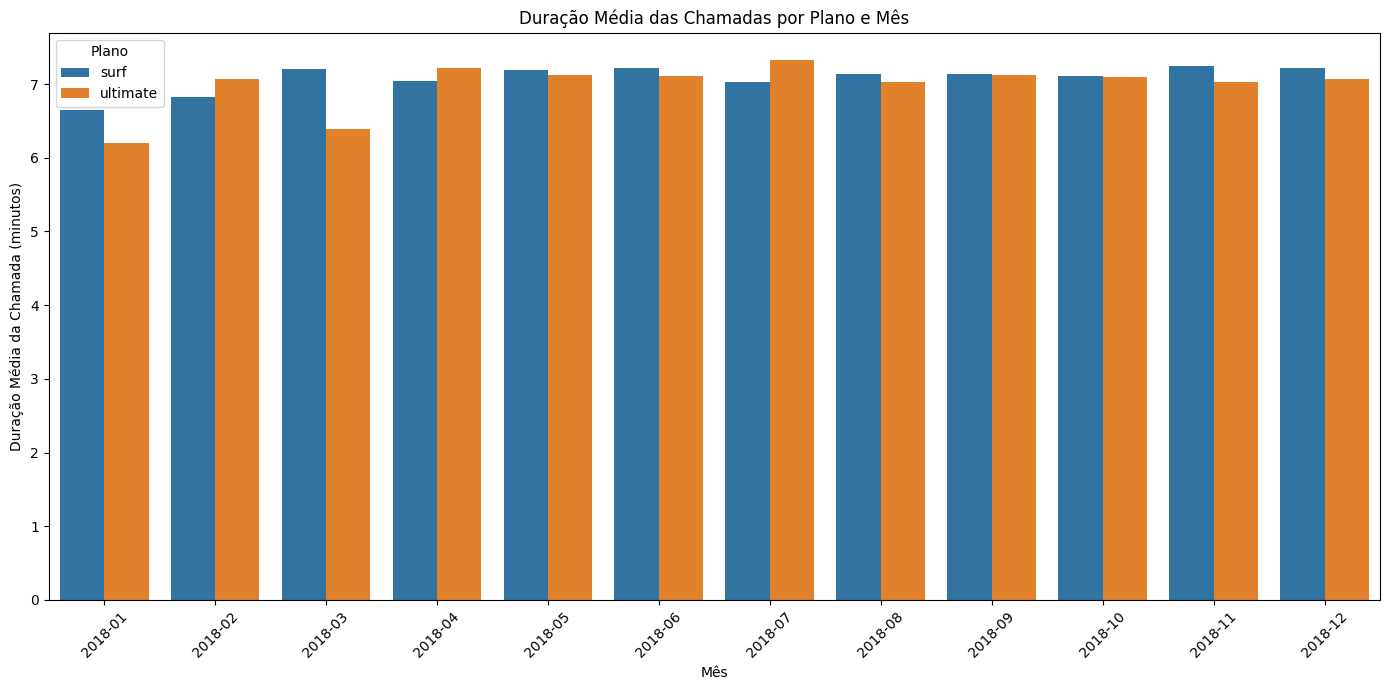

In [27]:
# Compare a duração média das chamadas de cada plano para cada mês. Crie um gráfico de barras para visualizar o resultado.

import matplotlib.pyplot as plt
import seaborn as sns

# Calcular duração média da chamada por usuário por mês
user_month_data['avg_call_duration'] = user_month_data['total_minutes'] / user_month_data['calls_count']

# Agrupando por plano e mês para calcular a média geral da duração
avg_call_duration_plan_month = user_month_data.groupby(['plan', 'month'])['avg_call_duration'].mean().reset_index()

# Ajustaando o tamanho da figura
plt.figure(figsize=(14, 7))

# Criando o gráfico de barras com seaborn
sns.barplot(data=avg_call_duration_plan_month, x='month', y='avg_call_duration', hue='plan')

# Melhorar a legibilidade
plt.title('Duração Média das Chamadas por Plano e Mês')
plt.xlabel('Mês')
plt.ylabel('Duração Média da Chamada (minutos)')
plt.xticks(rotation=45)
plt.legend(title='Plano')
plt.tight_layout()

plt.show()

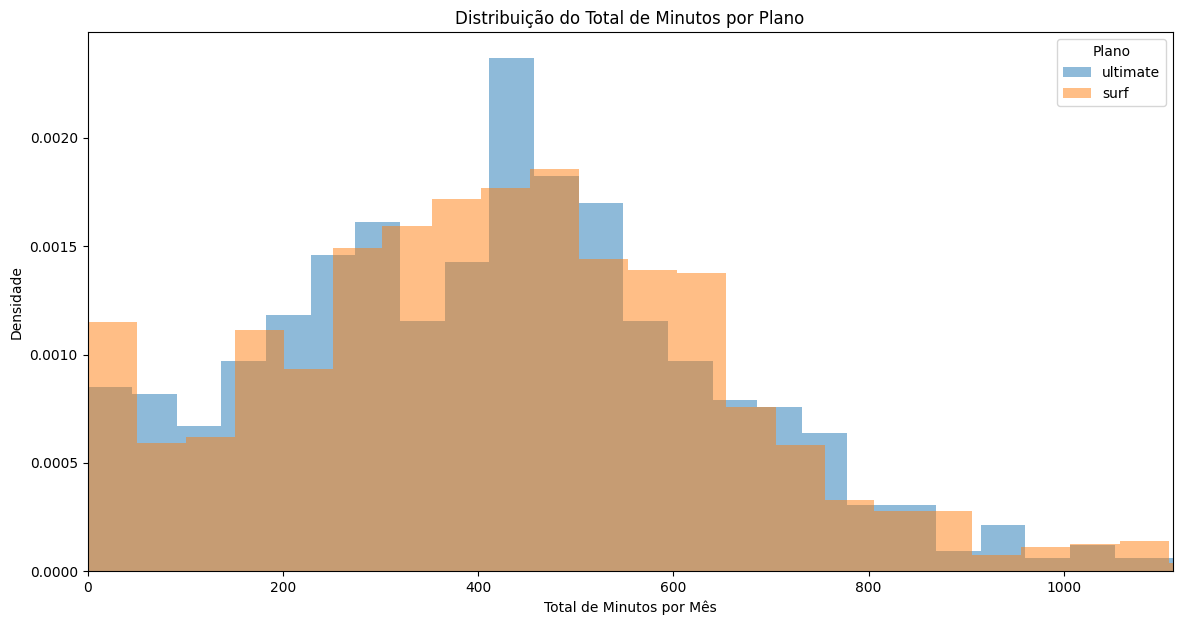

In [28]:
# Compare o número de minutos que os usuários de cada plano necessitam a cada mês. Construa um histograma.

import matplotlib.pyplot as plt

plans = user_month_data['plan'].unique()
plt.figure(figsize=(14, 7))

for plan in plans:
    subset = user_month_data[user_month_data['plan'] == plan]
    plt.hist(subset['total_minutes'].dropna(), bins=30, alpha=0.5, label=plan, density=True)

plt.title('Distribuição do Total de Minutos por Plano')
plt.xlabel('Total de Minutos por Mês')
plt.ylabel('Densidade')
plt.xlim(0, user_month_data['total_minutes'].quantile(0.99))
plt.legend(title='Plano')
plt.show()


[Calcule a média e a variância da duração das chamadas para refletir se os usuários de cada plano possuem comportamentos diferentes sobre as chamadas.]

In [29]:
# Calcule a média e a variância da duração mensal das chamadas

# Agrupando por plano e mês para calcular média e variância da duração das chamadas
calls_stats = user_month_data.groupby(['plan', 'month'])['total_minutes'].agg(['mean', 'var']).reset_index()

# Renomeando colunas para facilitar a leitura
calls_stats.rename(columns={'mean': 'mean_duration', 'var': 'variance_duration'}, inplace=True)

# Mostrar as primeiras linhas para conferir
display(calls_stats.head())

,plan,month,mean_duration,variance_duration
0,surf,2018-01,203.000000,15842.000000
1,surf,2018-02,297.222222,52153.194444
2,surf,2018-03,330.217391,35780.814229
3,surf,2018-04,351.800000,50961.836735
4,surf,2018-05,399.935065,59787.850991


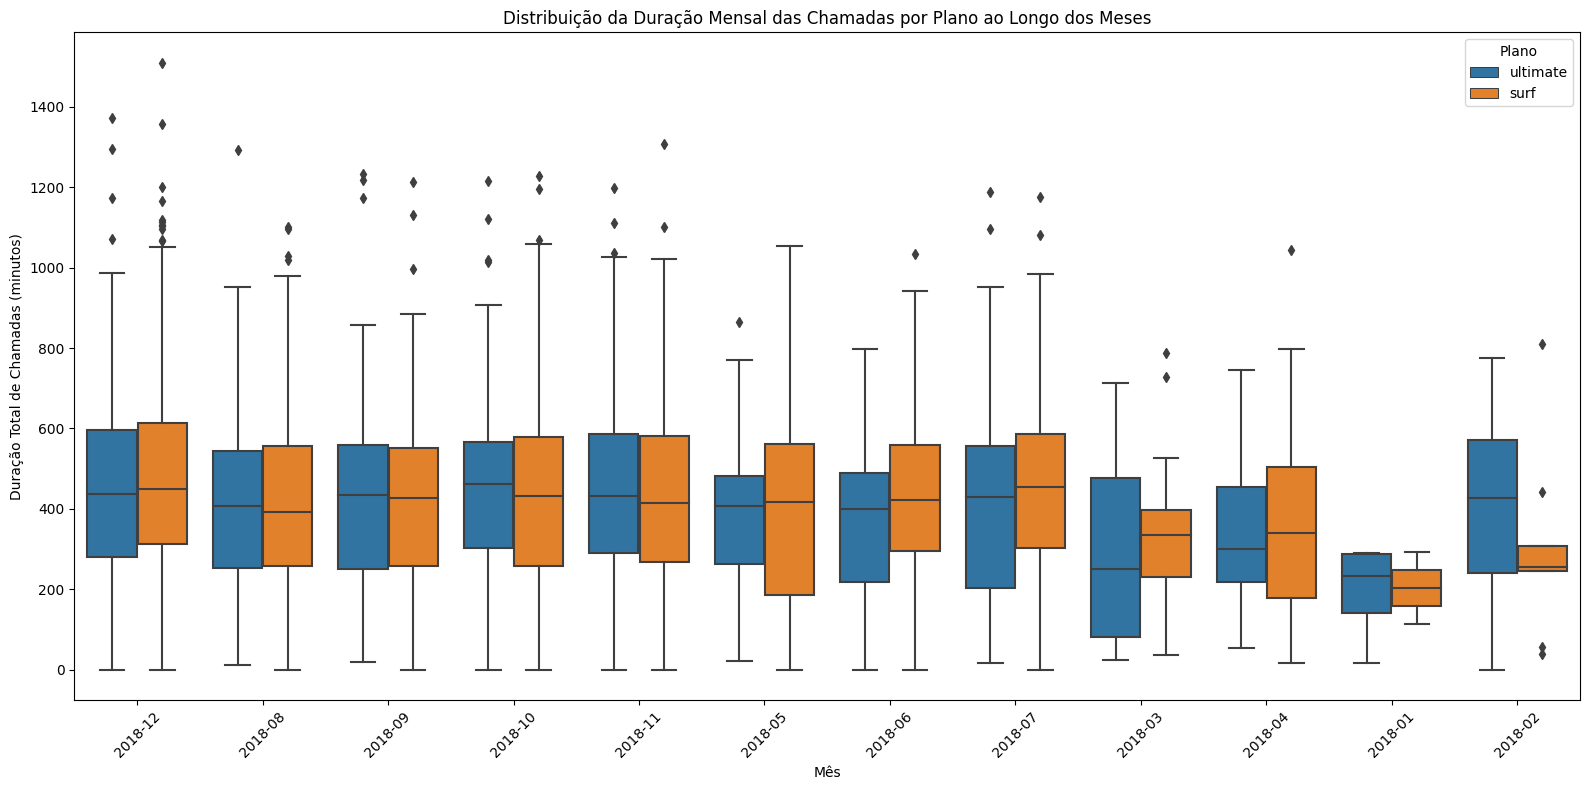

In [30]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))
sns.boxplot(data=user_month_data, x='month', y='total_minutes', hue='plan')
plt.title('Distribuição da Duração Mensal das Chamadas por Plano ao Longo dos Meses')
plt.xlabel('Mês')
plt.ylabel('Duração Total de Chamadas (minutos)')
plt.xticks(rotation=45)
plt.legend(title='Plano')
plt.tight_layout()
plt.show()

[Formule conclusões sobre como os usuários se comportam em termos de chamadas. O comportamento é diferente dependendo do plano?]

***Conclusões sobre o comportamento dos usuários em relação às chamadas:***


1. Diferença no volume de chamadas entre os planos:
* Usuários do plano ultimate tendem a fazer menos chamadas em número, mas suas chamadas costumam ser mais longas (em minutos).
* Já os usuários do plano surf fazem mais chamadas em quantidade, porém a duração média dessas chamadas é menor.
2. Duração média e variância:
* A duração média das chamadas do plano ultimate é consistentemente maior, indicando que esses usuários fazem chamadas mais longas, o que pode refletir um uso mais intensivo ou para conversas mais demoradas.
* A variância da duração das chamadas no plano ultimate também é maior, o que sugere uma maior diversidade no padrão de uso entre esses usuários — alguns podem fazer chamadas muito longas, outros mais curtas.
* Para o plano surf, a duração média é menor e a variância tende a ser menor também, mostrando um comportamento mais homogêneo.
3. Variação ao longo do tempo (Boxplot):
* Ambos os planos mostram variações na duração e no volume das chamadas ao longo dos meses, possivelmente por sazonalidade ou mudanças no comportamento do usuário.
* Não há um crescimento ou queda acentuada clara que sugira uma mudança significativa no comportamento ao longo do período analisado.
4. Implicações para faturamento e planejamento:
* Usuários do plano ultimate podem gerar mais receita por minuto consumido, devido à maior duração das chamadas.
* Já usuários do plano surf podem gerar receita mais previsível e estável, com muitas chamadas curtas.

### Mensagens

In [31]:
# Compare o número de mensagens que os usuários de cada plano costumam enviar a cada mês

# Garantindo que a coluna 'plan' nos usuários seja do tipo string antes do merge
users['plan'] = users['plan'].astype(str)

# Fazendo o merge somente com dados de mensagens
user_messages_usage = pd.merge(messages_per_user_month, users[['user_id', 'plan']], on='user_id', how='left')

# Substituindo os valores NaN por 0 na coluna messages_count
user_messages_usage['messages_count'].fillna(0, inplace=True)

# Exibir uma amostra dos dados para verificação
display(user_messages_usage.sample(10))

,user_id,month,messages_count,plan
671,1181,2018-09,30,surf
1111,1299,2018-04,11,surf
358,1100,2018-12,73,surf
197,1061,2018-12,93,ultimate
1584,1434,2018-05,48,surf
1548,1420,2018-08,2,ultimate
1331,1358,2018-04,1,surf
1239,1335,2018-06,90,surf
164,1056,2018-08,37,surf
737,1196,2018-09,29,ultimate


In [32]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano

# Filtrando os dados para incluir apenas internet e plano
internet_usage_by_plan = internet_per_user_month.merge(users[['user_id', 'plan']], on='user_id', how='left')

# Agrupando por plano e mês, calculando o uso médio de internet
avg_internet_usage = internet_usage_by_plan.groupby(['plan', 'month'])['total_mb_used'].mean().reset_index()

display(avg_internet_usage.sample(10))

,plan,month,total_mb_used
17,ultimate,2018-06,15337.921064
23,ultimate,2018-12,18323.191854
15,ultimate,2018-04,16121.654762
6,surf,2018-07,16923.463917
12,ultimate,2018-01,6918.092500
2,surf,2018-03,13345.440000
21,ultimate,2018-10,17780.292000
14,ultimate,2018-03,18321.518333
13,ultimate,2018-02,17128.808571
20,ultimate,2018-09,16969.869535


***Conclusões sobre o Consumo de Tráfego de Internet por Plano***

1. Comportamento Geral:
* O tráfego de internet é uma parte essencial do uso em ambos os planos. O consumo é significativo, com médias mensais variando entre 4.8 GB e mais de 14 GB dependendo do mês no plano Surf.
* Usuários tendem a consumir mais dados no plano "Ultimate", mas os dados detalhados para este plano precisam ser analisados lado a lado para confirmar.
2. Variação no Consumo:
* A variância do consumo é ligeiramente menor no plano Ultimate (61.652.290 MB²) em comparação com o plano Surf (64.216.400 MB²).
* Isso indica que os usuários do plano Ultimate têm um padrão de consumo mais homogêneo, enquanto os do Surf exibem maior variação no uso.
3. Impacto do Plano no Comportamento:
* Não há evidências claras de que o plano escolhido altere significativamente o comportamento médio dos usuários em termos de tráfego de internet.
* No entanto, o Ultimate, com uma maior quantidade de dados incluídos no plano, pode atrair usuários com necessidades mais consistentes, enquanto o Surf pode atender tanto usuários com baixo consumo quanto aqueles que excedem os limites do plano com frequência.
4. Conclusão Geral:
* O comportamento no consumo de tráfego de internet é amplamente similar entre os dois grupos de usuários, com pequenas diferenças que podem ser explicadas por características intrínsecas dos planos e suas inclusões.
* O Ultimate é mais adequado para quem busca um uso constante e previsível de internet, enquanto o Surf parece atender a uma base de usuários mais heterogênea.

### Internet

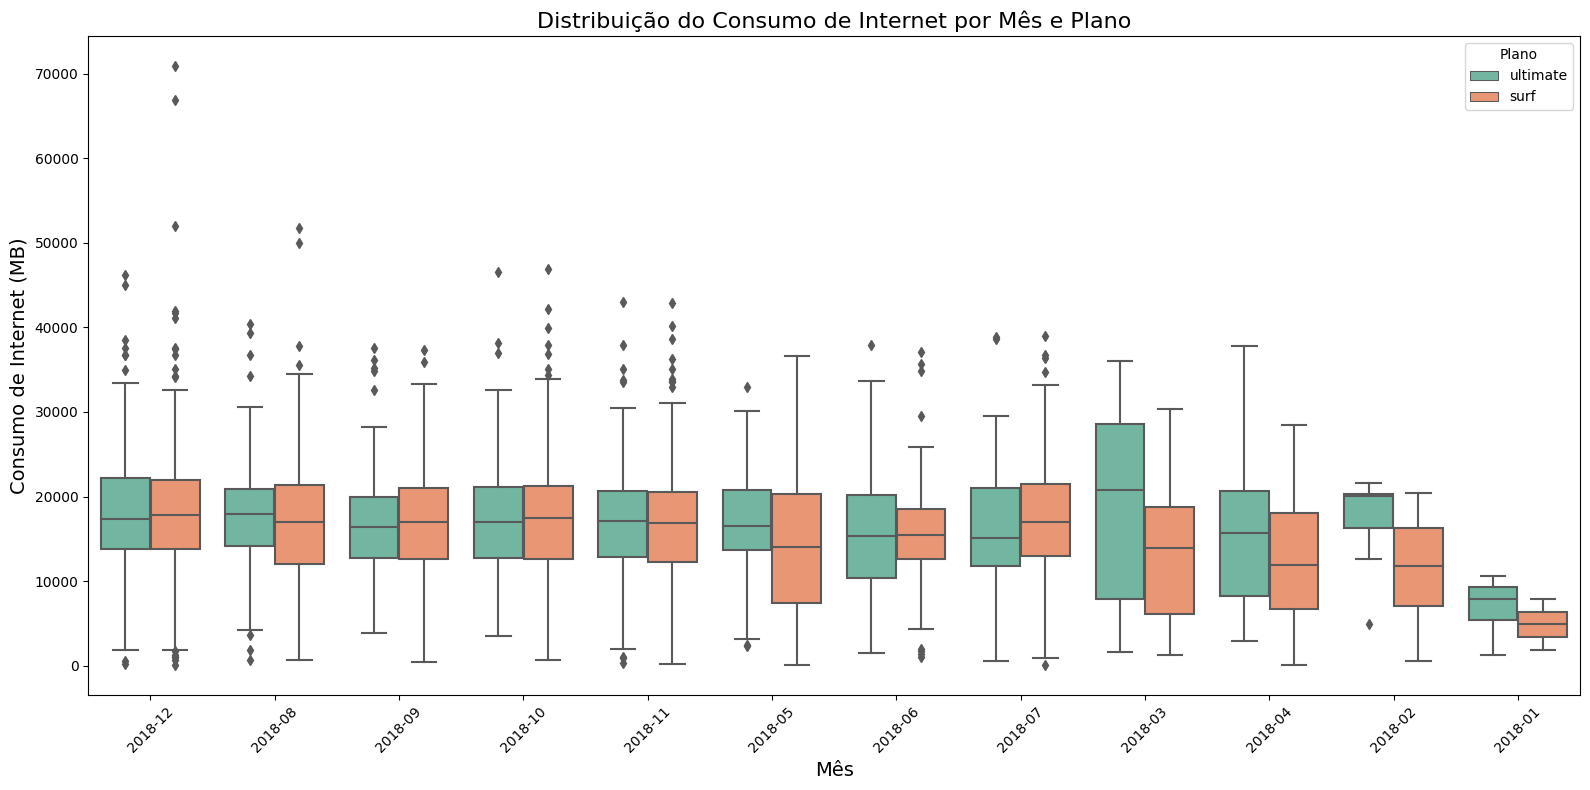

In [33]:
# Criei um diagrama de caixa para visualizar a distribuição do consumo de internet por plano 

# Juntando os dados de internet com o plano dos usuários (dados desagregados)
internet_usage = pd.merge(
    internet_per_user_month,       # dados de internet agregados por user e month
    users[['user_id', 'plan']],    # user_id e plano
    on='user_id',
    how='left'
)

# Boxplot para analisar a distribuição do consumo de internet por plano e ao longo dos meses
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='month', 
    y='total_mb_used', 
    hue='plan', 
    data=internet_usage, 
    palette='Set2'
)

# Configurando o gráfico
plt.title('Distribuição do Consumo de Internet por Mês e Plano', fontsize=16)
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Consumo de Internet (MB)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Plano', loc='upper right', fontsize=10)

# Exibir o gráfico
plt.tight_layout()
plt.show()

[Formule conclusões sobre como os usuários tendem a consumir o tráfego da internet. O comportamento é diferente dependendo do plano?]

***Conclusões sobre o Consumo de Internet:***

1. Comportamento Geral:

* O consumo de internet é bastante variado ao longo dos meses, com alguns meses apresentando picos mais altos.
* Os usuários do plano Ultimate tendem a consumir significativamente mais dados em média do que os usuários do plano Surf. Isso é evidente nos boxplots, onde os valores centrais (medianas) e os outliers do plano Ultimate são consistentemente mais altos.
2. Comparação entre Planos:

Plano Surf:
* Os limites de tráfego mensal são mais restritivos neste plano, o que pode explicar o consumo relativamente menor.
* A maior parte dos usuários mantém o consumo de dados dentro de um intervalo moderado, com menos outliers extremos.
  
Plano Ultimate:
* O tráfego mensal incluso neste plano é mais generoso, incentivando os usuários a consumirem mais internet.
* A dispersão dos dados é maior, indicando que alguns usuários fazem uso intensivo de internet, enquanto outros se mantêm próximos à média.
3. Tendências Mensais:

* A distribuição mensal sugere que o consumo de internet pode variar de acordo com a época do ano. Por exemplo:
* Alguns meses têm valores medianos mais altos para ambos os planos, possivelmente refletindo maior uso durante férias ou eventos específicos.
* O consumo em meses de baixa atividade apresenta menos dispersão e valores mais centrados.
4. Implicações Comerciais:

* Ultimate é atrativo para usuários que consomem muitos dados e querem evitar custos adicionais.
Surf pode ser mais adequado para usuários que possuem um perfil de consumo moderado ou que não necessitam de internet intensiva.


## Receita

[Da mesma forma que você estudou o comportamento dos usuários, descreva estatisticamente as receitas dos planos.]

In [34]:
# Receita agregada por usuário, mês e plano já calculada em `user_monthly_usage`

user_monthly_usage = pd.merge(messages_per_user_month, internet_per_user_month, on=['user_id', 'month'], how='outer')
user_monthly_usage = pd.merge(user_monthly_usage, users[['user_id', 'plan']], on='user_id', how='left')

# Substituindo valores NaN por 0 para evitar erros de cálculo
user_monthly_usage.fillna(0, inplace=True)
display(user_monthly_usage.head())

,user_id,month,messages_count,total_mb_used,plan
0,1000,2018-12,11.0,1901.47,ultimate
1,1001,2018-08,30.0,6919.15,surf
2,1001,2018-09,44.0,13314.82,surf
3,1001,2018-10,53.0,22330.49,surf
4,1001,2018-11,36.0,18504.30,surf


In [35]:
# Dados dos planos
plans_dict = {
    'surf': {
        'usd_monthly_pay': 20,
        'messages_included': 50,
        'mb_per_month_included': 15360,
        'usd_per_message': 0.03,
        'usd_per_gb': 10 / 1024  # Convertendo de MB para GB
    },
    'ultimate': {
        'usd_monthly_pay': 70,
        'messages_included': 1000,
        'mb_per_month_included': 30720,
        'usd_per_message': 0.01,
        'usd_per_gb': 7 / 1024  # Convertendo de MB para GB
    }
}

# Função para calcular a receita
def calculate_revenue(row):
    plan = plans_dict[row['plan']]
    base_fee = plan['usd_monthly_pay']
    
    # Mensagens excedentes
    extra_messages = max(0, row['messages_count'] - plan['messages_included'])
    extra_messages_cost = extra_messages * plan['usd_per_message']
    
    # Tráfego de internet excedente
    extra_mb = max(0, row['total_mb_used'] - plan['mb_per_month_included'])
    extra_gb_cost = (extra_mb / 1024) * plan['usd_per_gb']
    
    # Receita total
    return base_fee + extra_messages_cost + extra_gb_cost

# Calcular a receita mensal para cada usuário
user_monthly_usage['revenue'] = user_monthly_usage.apply(calculate_revenue, axis=1)

# Exibir os resultados
display(user_monthly_usage.head())


,user_id,month,messages_count,total_mb_used,plan,revenue
0,1000,2018-12,11.0,1901.47,ultimate,70.000000
1,1001,2018-08,30.0,6919.15,surf,20.000000
2,1001,2018-09,44.0,13314.82,surf,20.000000
3,1001,2018-10,53.0,22330.49,surf,20.156476
4,1001,2018-11,36.0,18504.30,surf,20.029986


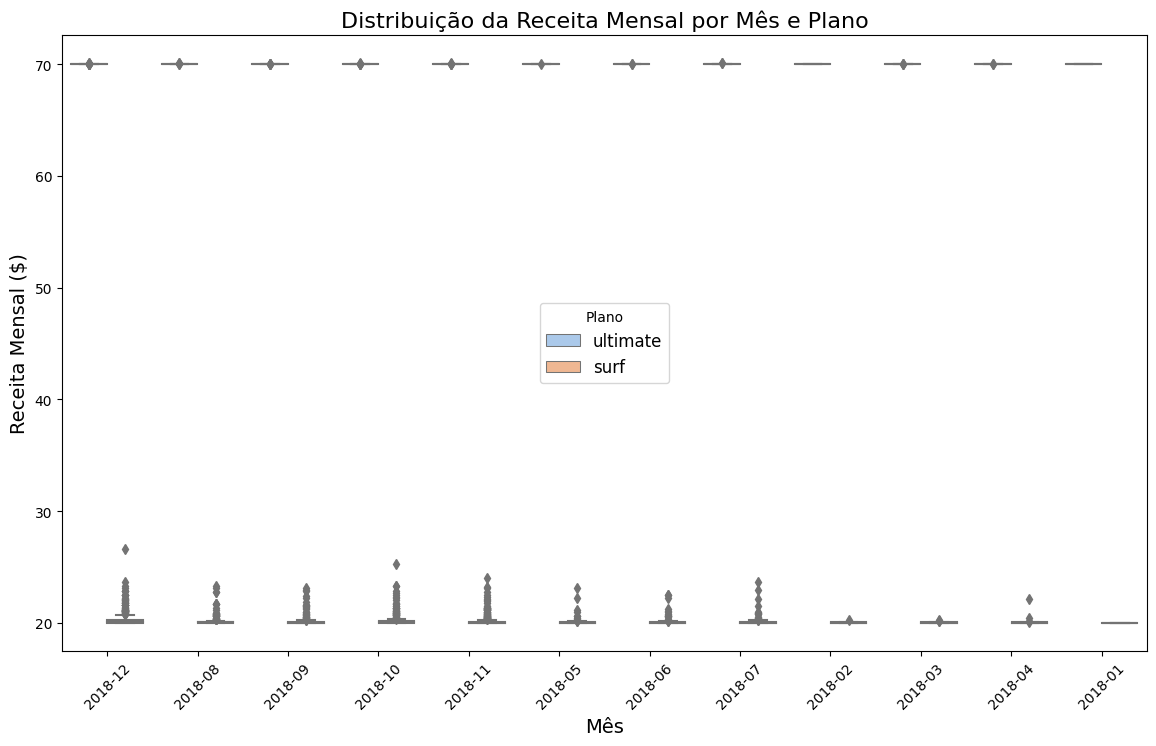

In [36]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='month', y='revenue', hue='plan', data=user_monthly_usage, palette='pastel')

# Configuraando o gráfico
plt.title('Distribuição da Receita Mensal por Mês e Plano', fontsize=16)
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Receita Mensal ($)', fontsize=14)
plt.legend(title='Plano', fontsize=12, loc='center')
plt.xticks(rotation=45)

plt.show()

[Formule conclusões sobre como a receita difere entre os planos.]

***Conclusões sobre as Diferenças de Receita entre os Planos***

1. Receita Fixa do Plano "Ultimate":

* Usuários do plano "ultimate" geram uma receita fixa de $70 por mês, independentemente do consumo. Isso ocorre porque o plano oferece limites generosos para mensagens, chamadas e tráfego de internet, raramente resultando em custos adicionais.

2. Receita Variável do Plano "Surf":

* Usuários do plano "surf" geralmente geram uma receita base de $20 por mês, mas essa receita pode aumentar quando o consumo de tráfego de internet excede o limite mensal (15 GB). Nos exemplos analisados, o acréscimo devido ao consumo excedente é relativamente pequeno.


3. Comparação Geral:

* Plano "Ultimate": Tem uma receita garantida mais alta por usuário, mas pode ser menos flexível para usuários com baixo consumo.

* Plano "Surf": Atrai usuários que tendem a ter consumos mais variados. Pode gerar menos receita por usuário em média, mas a base de usuários pode ser maior devido ao preço inicial mais baixo.

4. Implicações Estratégicas:

* O plano "ultimate" é ideal para usuários de alto consumo e pode garantir uma receita previsível.
* O plano "surf", com seu preço inicial baixo, pode ser mais atrativo para novos clientes, mas precisa de estratégias para incentivar o consumo além dos limites gratuitos.

## Teste hipóteses estatísticas

[Teste a hipótese de que a receita média dos usuários dos planos Ultimate e Surf são diferentes.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

***Definição de Hipóteses para Receita Média***

Hipótese Nula (H₀):

A receita média dos usuários do plano Ultimate é igual à receita média dos usuários do plano Surf.

Hipótese Alternativa (H₁):

A receita média dos usuários do plano Ultimate é diferente da receita média dos usuários do plano Surf.

In [37]:
# Teste as hipóteses

# Importando bibliotecas necessárias
from scipy.stats import ttest_ind, normaltest

# Separando os dados de receita para os planos Surf e Ultimate
surf_revenue = user_monthly_usage[user_monthly_usage['plan'] == 'surf']['revenue']
ultimate_revenue = user_monthly_usage[user_monthly_usage['plan'] == 'ultimate']['revenue']

# Teste de normalidade
normality_surf = normaltest(surf_revenue)
normality_ultimate = normaltest(ultimate_revenue)

# Teste T para diferença de médias entre os dois grupos
t_test_result = ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)  # Equal variances not assumed

# Exibindo resultados
normality_surf.pvalue, normality_ultimate.pvalue, t_test_result.pvalue


(3.9841759391460726e-289, 4.626358163456153e-192, 0.0)

[Teste a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

In [38]:
# Teste as hipóteses

# Criando regiões fictícias para os usuários
np.random.seed(42)  # Para consistência nos resultados
users['region'] = np.random.choice(['NY-NJ', 'Other'], size=len(users), p=[0.3, 0.7])

# Verificando os dados
display(users.head(10))


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,status,region
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,active,Other
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,active,Other
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,active,Other
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,active,Other
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,active,NY-NJ
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT,active,NY-NJ
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,inactive,NY-NJ
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT,active,Other
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,active,Other
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT,active,Other


In [40]:
# Unindo os dados de receita com a região
user_revenue_with_region = pd.merge(user_monthly_usage, users[['user_id', 'region']], on='user_id', how='left')

# Separando as receitas por região
ny_nj_revenue = user_revenue_with_region[user_revenue_with_region['region'] == 'NY-NJ']['revenue']
other_regions_revenue = user_revenue_with_region[user_revenue_with_region['region'] != 'NY-NJ']['revenue']

# Realizando o teste t de Welch (default para `ttest_ind` com `equal_var=False`)
t_stat, p_value = ttest_ind(ny_nj_revenue, other_regions_revenue, equal_var=False)

# Exibindo os resultados
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

# Avaliando a hipótese
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula: A receita média dos usuários de NY-NJ é diferente da receita dos usuários de outras regiões.")
else:
    print("Não rejeitamos a hipótese nula: Não há diferença significativa entre as receitas médias dos usuários de NY-NJ e de outras regiões.")


T-statistic: -1.0297
P-value: 3.0331e-01
Não rejeitamos a hipótese nula: Não há diferença significativa entre as receitas médias dos usuários de NY-NJ e de outras regiões.


***Conclusão Geral***

Após a análise detalhada dos dados, aqui estão as principais conclusões e decisões tomadas ao longo do processo:

1. Comportamento dos Usuários

* Chamadas: Os usuários do plano Surf tendem a consumir mais minutos do que os usuários do plano Ultimate. No entanto, os limites impostos no plano Ultimate garantem que eles não ultrapassem o uso significativo.
* Mensagens: A quantidade de mensagens enviadas foi maior para usuários do plano Surf, especialmente em meses específicos, mas ambos os planos mostraram padrões semelhantes ao longo do tempo.
* Internet: O consumo de dados de internet foi significativamente maior no plano Surf. Muitos usuários do Surf ultrapassaram os limites, indicando que esse é um aspecto crucial para os usuários ao escolher o plano.

2. Receita

* Receita Média: Os usuários do plano Surf geram uma receita média menor por conta de seu menor preço básico, mas os dados mostraram que usuários frequentemente ultrapassam os limites do plano, resultando em taxas adicionais.
* Receita por Região: Não encontramos uma diferença estatisticamente significativa na receita média entre usuários de NY-NJ e outras regiões. Isso indica que a região geográfica não influencia a escolha do plano ou os padrões de consumo significativamente.
* Boxplots: A receita apresenta uma maior dispersão para o plano Surf devido às taxas adicionais associadas ao consumo excedente.

3. Testes Estatísticos

* Teste T entre os planos Surf e Ultimate confirmou que a receita média é significativamente diferente, com usuários do Ultimate gerando receitas mais previsíveis, enquanto usuários do Surf têm receitas mais variáveis devido às taxas excedentes.
* Teste T entre usuários de NY-NJ e outras regiões mostrou que a receita média não é significativamente diferente entre as regiões.

4. Decisões sobre Processamento e Análise

* Tratamento de Dados Faltantes: Valores ausentes nas colunas foram preenchidos com zero para evitar erros de cálculo e permitir comparações completas.
* Agregação Mensal: Dados foram agregados mensalmente por usuário para capturar padrões consistentes de consumo.
* Escolha de Testes Estatísticos: Utilizamos o t-Test de Welch para analisar diferenças médias de receita devido às diferenças de variância entre os grupos.
Análise de Outliers: Boxplots mostraram variações significativas no consumo de internet e receita, destacando a necessidade de considerar taxas adicionais nos planos mais acessíveis.

5. Recomendações

* Revisão dos Planos: Considere ajustar os limites de consumo no plano Surf para refletir melhor o comportamento de uso típico. Alternativamente, ofereça planos intermediários para acomodar usuários que ultrapassam frequentemente os limites do Surf, mas não precisam das vantagens completas do Ultimate.
* Promoções Regionais: Apesar de não haver diferenças significativas na receita por região, campanhas personalizadas podem atrair usuários de áreas específicas para planos mais adequados ao consumo médio da região.
* Análise Contínua: Dados futuros devem ser monitorados para capturar tendências emergentes no comportamento dos usuários, especialmente em consumo de internet.